In [1]:
from transformers import GPT2LMHeadModel, AutoTokenizer
import torch
import numpy as np
torch.cuda.empty_cache()
from transformers import pipeline
device = torch.device("cuda")
import pandas as pd
import math
import random
import plotly.express as px
tokenizer = AutoTokenizer.from_pretrained('/home/ubuntu/transformers/examples/pytorch/language-modeling/ZymCTRL')
model = GPT2LMHeadModel.from_pretrained('/home/ubuntu/transformers/examples/pytorch/language-modeling/ZymCTRL').to(device)

In [21]:
train_df = pd.read_csv('train_perplexity_14_11_22_final.csv')

In [22]:
train_df

,ID,Perplexity
0,1.1.1.184_0_0.fasta,2.384835
1,1.1.1.184_10_0.fasta,1.284228
2,1.1.1.184_10_1.fasta,1.695280
3,1.1.1.184_1_0.fasta,1.116237
4,1.1.1.184_11_0.fasta,1.688847
...,...,...
995,3.1.3.87_44_1.fasta,1.227747
996,3.1.3.87_45_0.fasta,2.838365
997,3.1.3.87_45_1.fasta,2.954249
998,3.1.3.87_46_0.fasta,2.821538


In [38]:
validation_df = pd.read_csv('validation_perplexity_14_11_22_final.csv')

In [39]:
validation_df

,ID,Perplexity
0,1.14.13.55_0_0.fasta,4.802984
1,1.14.13.55_0_1.fasta,3.183410
2,1.14.13.55_10_0.fasta,6.506311
3,1.14.13.55_10_1.fasta,4.894712
4,1.14.13.55_1_0.fasta,4.559447
...,...,...
995,3.6.3.18_6_0.fasta,1.872039
996,3.6.3.18_6_1.fasta,1.588802
997,3.6.3.18_7_0.fasta,2.129709
998,3.6.3.18_7_1.fasta,1.983576


In [9]:
invented_df = pd.read_csv('invented_perplexity_14_11_22_final.csv')

In [10]:
invented_df

,ID,Perplexity
0,0.0.0.9_0_0.fasta,8.687664
1,0.0.0.9_0_1.fasta,9.681226
2,0.0.0.9_10_0.fasta,9.943676
3,0.0.0.9_10_1.fasta,10.988205
4,0.0.0.9_1_0.fasta,10.751080
...,...,...
995,99.9.4.3_9_0.fasta,8.811774
996,99.9.4.3_9_1.fasta,9.041528
997,9.9.9.9_0_0.fasta,9.976641
998,9.9.9.9_10_0.fasta,6.791383


In [11]:
generated_df = pd.read_csv('generated_perplexity_14_11_22_final.csv')

In [12]:
generated_df

,ID,Perplexity
0,1.1.1.36_0_0.fasta,3.321219
1,1.1.1.36_0_1.fasta,1.447628
2,1.1.1.36_10_0.fasta,1.384559
3,1.1.1.36_10_1.fasta,1.312679
4,1.1.1.36_1_0.fasta,2.816439
...,...,...
995,3.4.21.97_32_1.fasta,4.775548
996,3.4.21.97_33_0.fasta,1.037908
997,3.4.21.97_33_1.fasta,1.176961
998,3.4.21.97_34_0.fasta,1.071486


In [99]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure()

fig.add_trace(go.Violin(
                        y=train_df['Perplexity'],fillcolor='rgba(93, 164, 214, 0.5)', 
                        opacity=0.6, x0='Training Set',points='all')
             )
fig.add_trace(go.Violin(y=validation_df['Perplexity'], fillcolor='rgba(255, 144, 14, 0.5)', 
                        opacity=0.6, x0='Validation Set',points='all')
             )
fig.add_trace(go.Violin(y=invented_df['Perplexity'], line_color='indianred', fillcolor='rgba(255, 65, 54, 0.5)', 
                        opacity=0.6, x0='Invented Set',points='all')
)
fig.add_trace(go.Violin(y=random_gen['Perplexity'], line_color='rgba(44, 160, 101, 0.5)', fillcolor='rgba(44, 160, 101, 0.5)', 
                        opacity=0.6, x0='Generated Set',points='all')
)                  
fig.update_traces(meanline_visible=True, box_visible=True)

fig.update_yaxes(
        title_text = "Perplexity",
        title_standoff = 25)
fig.update_xaxes(
        tickangle = 90,
        #title_text = "Datasets",
        title_standoff = 25)

fig.update_layout(violingap=0.3, violinmode='overlay', showlegend=False, plot_bgcolor='rgba(0,0,0,0)', yaxis=dict(
        autorange=True,
        zeroline=False,
        zerolinecolor='rgb(255, 255, 255)')),
layout = go.Layout(
    autosize=False,
    width=800,
    height=1000)

fig.show()

In [74]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure()

fig.add_trace(go.Box(y=train_df['Perplexity'], fillcolor='rgba(93, 164, 214, 0.5)', 
                        opacity=0.6, boxpoints='all',jitter=0.5, x0='Training Set')
             )
fig.add_trace(go.Box(y=validation_df['Perplexity'],fillcolor='rgba(255, 144, 14, 0.5)',
                     opacity=0.6, boxpoints='all', jitter=0.5, x0='Validation Set' )
             )
fig.add_trace(go.Box(y=random_gen['Perplexity'], line_color='indianred', fillcolor='rgba(255, 65, 54, 0.5)',  
                        opacity=0.6, boxpoints='all',x0='Generated Set')
)
fig.add_trace(go.Box(y=invented_df['Perplexity'], line_color='rgba(44, 160, 101, 0.5)', fillcolor=, jitter= 0.5, boxpoints='all', x0='Invented Set')
)                  
#fig.update_traces(meanline_visible=True)

fig.update_yaxes(
        title_text = "Perplexity",
        title_standoff = 25)
fig.update_xaxes(
        tickangle = 90,
        #title_text = "Datasets",
        title_standoff = 25)

fig.update_layout(showlegend=False, plot_bgcolor='rgba(0,0,0,0)', yaxis=dict(
        autorange=True,
        zeroline=True,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2)), 
margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,), 
layout = go.Layout(
    autosize=False,
    width=1200,
    height=1600)

fig.show()

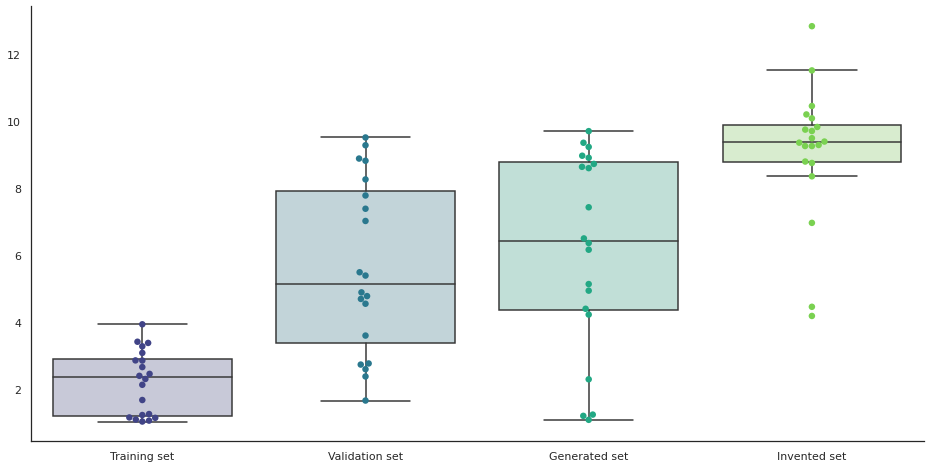

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(rc={'figure.figsize':(16,8)})

combined_dfs = pd.DataFrame({'Training set': train_df['Perplexity'],
                             'Validation set': validation_df['Perplexity'],
                             'Generated set': random_gen['Perplexity'],
                             'Invented set': invented_df['Perplexity']})
sns.set_style('white')
fig, ax = plt.subplots()
ax = sns.boxplot(data=combined_dfs, palette='viridis', showfliers = False)
ax = sns.swarmplot(data=combined_dfs, palette='viridis', size=6.5)
for patch in ax.artists:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, .3))
sns.despine();
#plt.show()
fig.savefig("Comparison_of_datasets.png", dpi=300)

/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


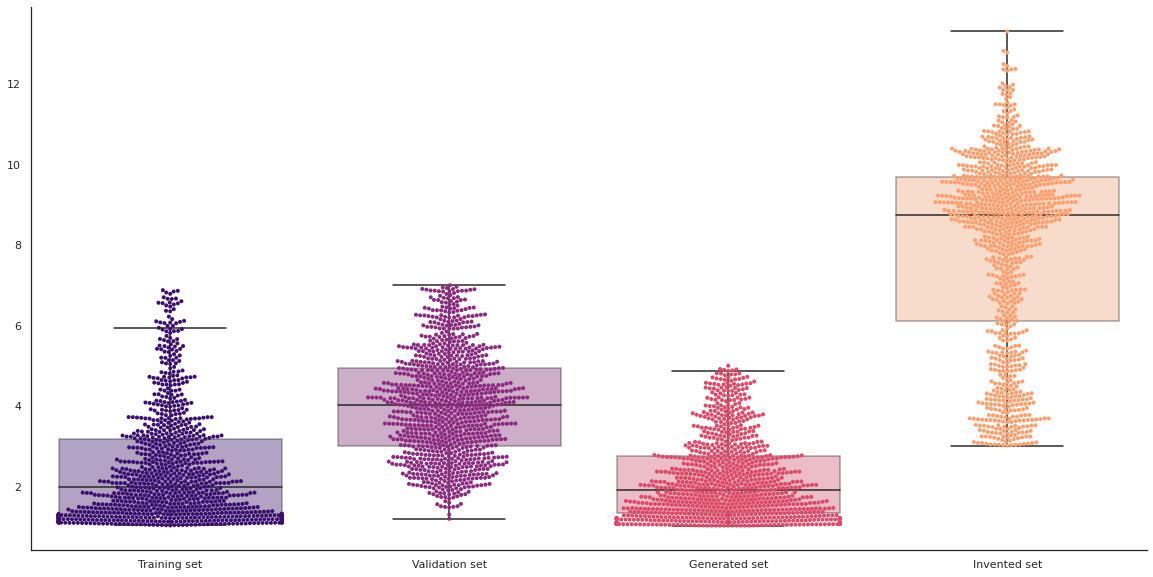

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})

combined_dfs = pd.DataFrame({'Training set': train_df['Perplexity'],
                             'Validation set': validation_df['Perplexity'],
                             'Generated set': generated_df['Perplexity'],
                             'Invented set': invented_df['Perplexity']})
sns.set_style('white')
fig, ax = plt.subplots()
ax = sns.swarmplot(data=combined_dfs, palette='magma', size=4)
ax = sns.boxplot(data=combined_dfs, palette='magma', showfliers = False, boxprops=dict(alpha=.4))
for patch in ax.artists:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, .3))
sns.despine();
plt.show()
fig.savefig("Comparison_of_datasets_complete.png", dpi=500)